In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 100
BATCH_SIZE = 32
EPOCHS = 50

In [12]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "apple data set",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 6404 files belonging to 13 classes.


In [4]:
class_names = dataset.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2']

In [5]:
len(dataset)

201

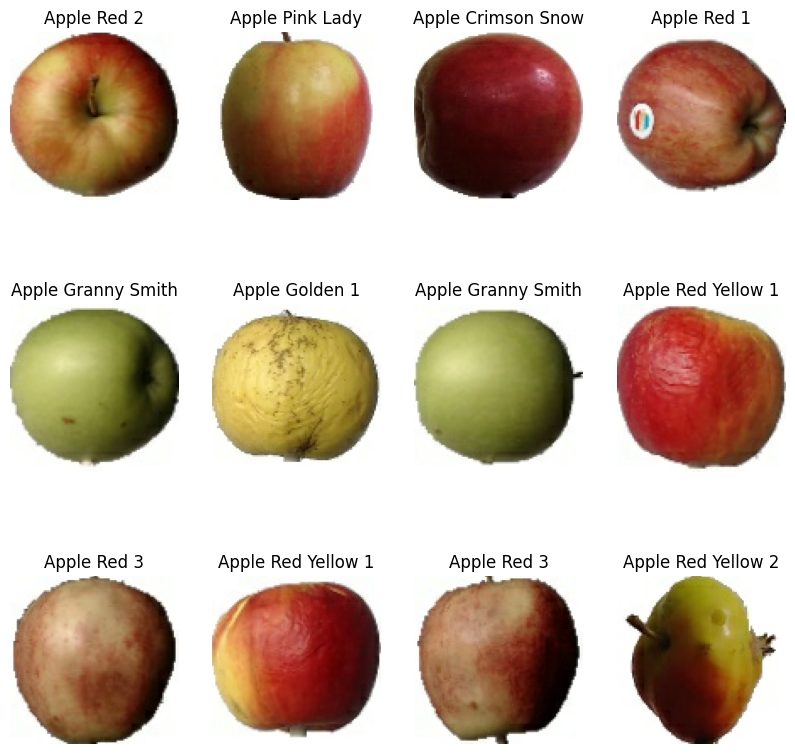

In [6]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [7]:
train_size = 0.8
len(dataset)*train_size

160.8

In [8]:
train_ds = dataset.take(160)
test_ds = dataset.skip(160)

In [9]:
val_size = 0.1
len(dataset)*val_size

20.1

In [10]:
val_ds = test_ds.take(20)
len(val_ds)

20

In [11]:
test_ds = test_ds.skip(20)
len(test_ds)

21